# Preprocessing the data

In [11]:
# Readthe csv data and crate the dataframe
from pathlib import Path
import pandas as pd

path = Path("Resources/combined_data.csv")
df = pd.read_csv(path)
df.dropna(inplace=True)

In [12]:
# slice features and target
x = df.drop(columns=['Fraud Reporting Count', 'Quarter'])
y = df["Fraud Reporting Count"].values.reshape(-1, 1)
display(x.head())
display(y[:5])

,Year,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
1,2014,39.8,82364.0,36.8
2,2014,38.1,95516.0,39.8
3,2014,36.0,94084.0,38.1
4,2015,39.0,90868.0,36.0
5,2015,42.6,90566.0,39.0


array([[95516],
       [94084],
       [90868],
       [90566],
       [96365]])

In [13]:
#Slicing data into train and test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [14]:
from sklearn.preprocessing  import StandardScaler

#Scaling x data
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

#Scaling y data
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Decision Tree Model

#### Training

In [15]:
#Train the decisin tree model
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=1)
model = model.fit(x_train_scaled, y_train_scaled)

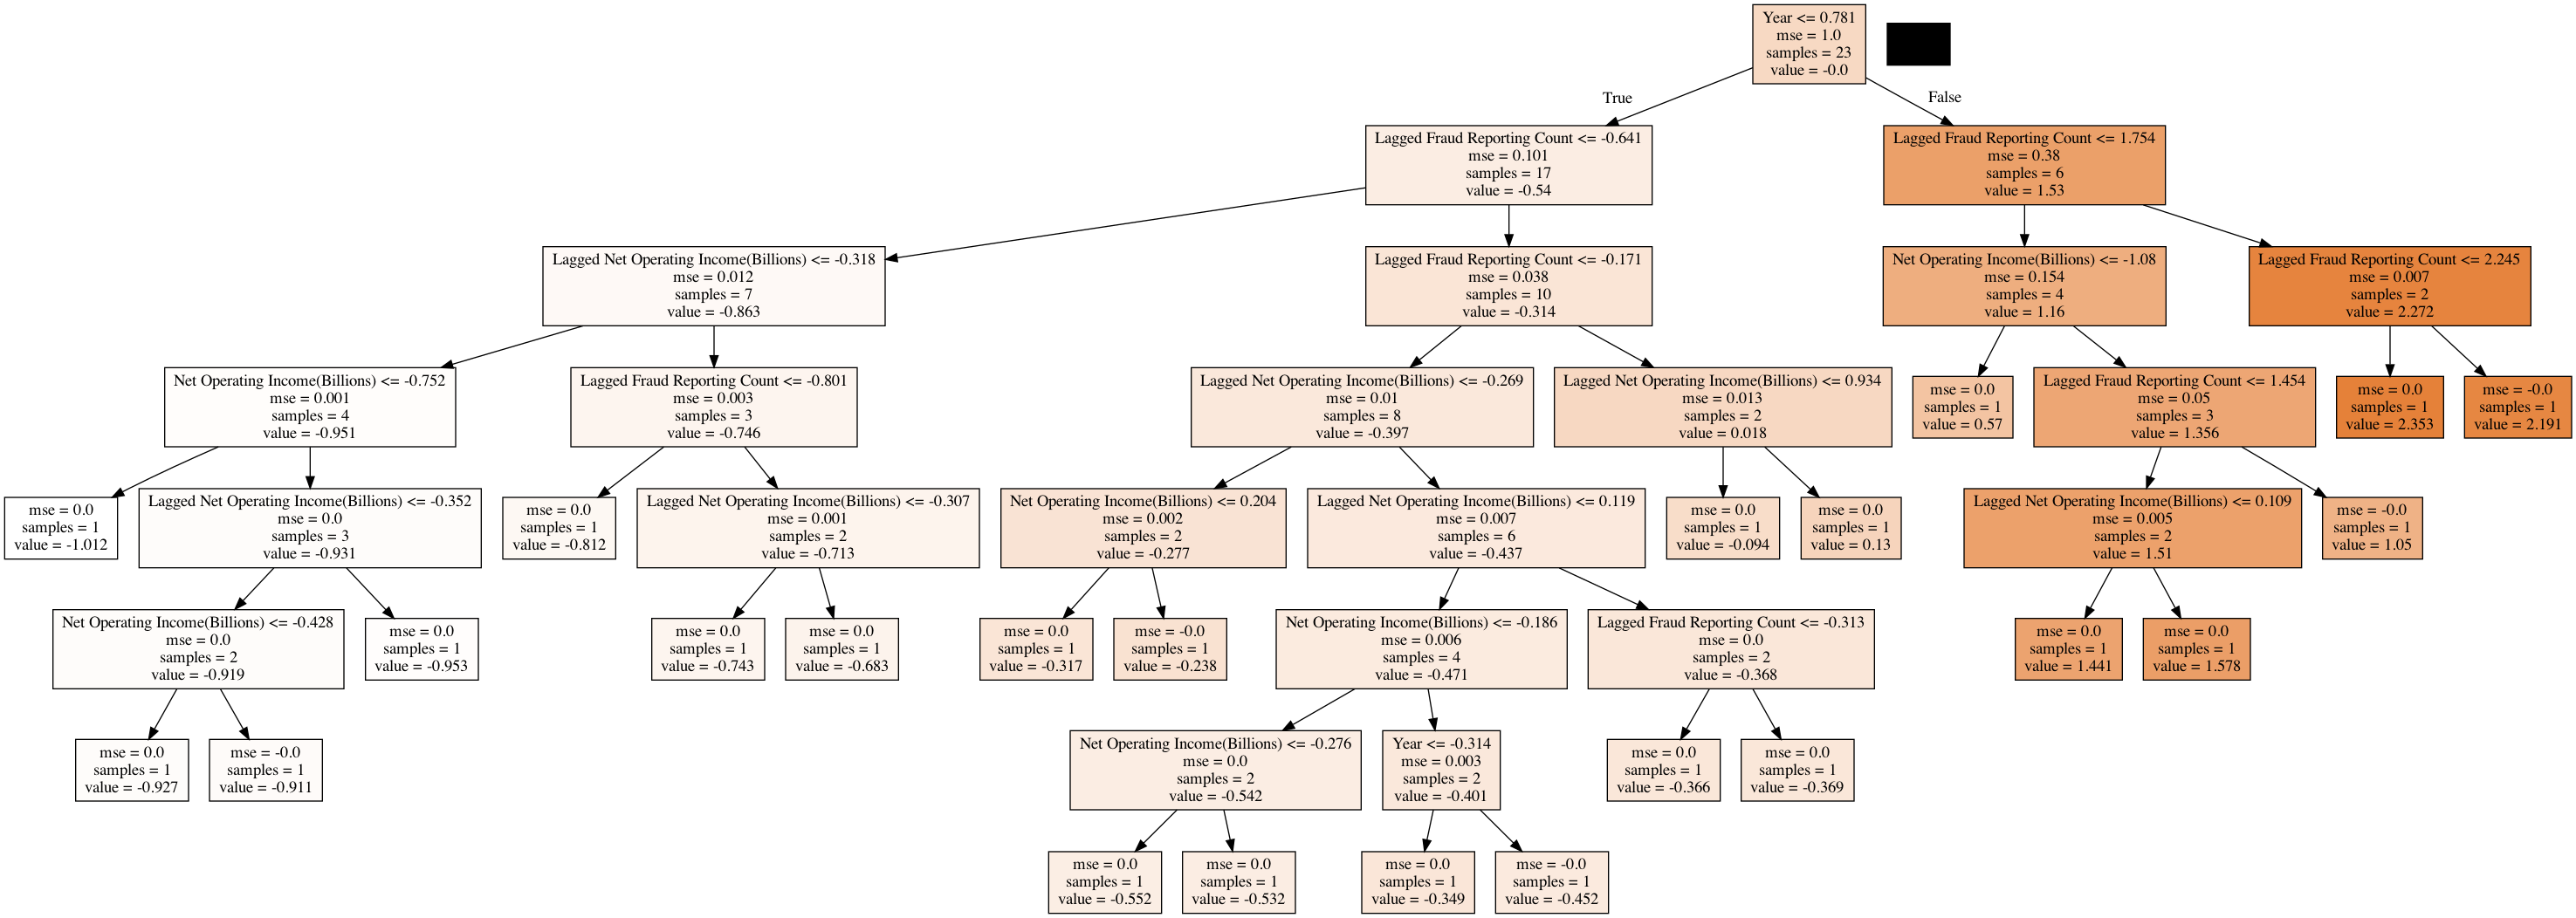

In [16]:
#Visualizing the Decision Tree Model
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None, feature_names=x.columns, class_names=["0", "1"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [17]:
#Perform the prediciton
y_pred = model.predict(x_test_scaled)


#### Results

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

#Displaying Metrics
print(f'The Mean Squared Error is: {mean_squared_error(y_test_scaled, y_pred)}')
display(f'The R squared is: {r2_score(y_test_scaled, y_pred)}')


The Mean Squared Error is: 0.18122363978453807


'The R squared is: 0.4804855756412755'

<AxesSubplot:>

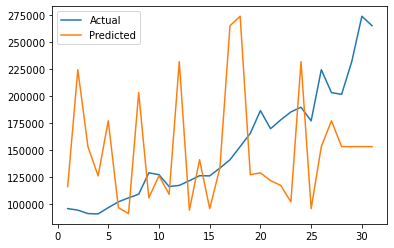

In [19]:
import numpy as np
y_pred_train = model.predict(x_train_scaled)
concatenated = np.concatenate((y_pred_train, y_pred))

y_predicted = y_scaler.inverse_transform(concatenated)

pd.DataFrame({
    "Actual":df["Fraud Reporting Count"],
    "Predicted":y_predicted
}).plot()

